In [2]:
import itertools
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import time
import pandas as pd

from scipy.stats import binom, norm
from math import comb

In [3]:
K_true = 3
M_true = 4

R_true = np.array([[0.1, 0.3, 0.4, 0.2],
                   [0.2, 0.4, 0.2, 0.2],
                   [0.5, 0.2, 0.1, 0.2]])

P_true = np.array([0.25, 0.35, 0.4])
Q_true = np.array([0.1, 0.2, 0.6])


X_param_true = np.array([[-5, 1.5],
                         [2, 1.6],
                         [7, 2.2]])


Y_param_true = np.array([[[-1, 0.5], [5, 1.5], [9, 0.5], [12, 0.8]],
                         [[-2, 0.5], [8, 0.9], [12, 0.8], [16, 0.8]],
                         [[-2, 0.5], [7, 0.9], [13, 0.8], [17, 0.8]]])

In [4]:
# K_true = 2
# M_true = 4

# R_true = np.array([[0.1, 0.3, 0.4, 0.2],
#                    [0.2, 0.4, 0.2, 0.2]])

# P_true = np.array([0.25, 0.75])
# Q_true = np.array([0.5, 0.8])


# X_param_true = np.array([[-5, 1.5],
#                          [2, 1.6]])


# Y_param_true = np.array([[[-1, 0.5], [5, 1.5], [9, 0.5], [12, 0.8]],
#                          [[-2, 0.5], [8, 0.9], [12, 1.1], [16, 1.2]]])

In [5]:
# K_true = 3
# M_true = 2

# R_true = np.array([[0.3, 0.7], 
#                    [0.9, 0.1], 
#                    [0.5, 0.5]])

# P_true = np.array([0.2, 0.5, 0.3])
# Q_true = np.array([0.1, 0.6, 0.8])


# X_param_true = np.array([[-5, 1.5], [5, 1.2], [10, 0.8]])

# Y_param_true = np.array([[[1, 0.5], [-1, 0.5]],
#                          [[5, 0.5], [-1, 0.5]],
#                          [[10, 0.5], [-1, 0.5]]])

In [6]:
def generate_data():
    # Choose idx of mixture on X
    i = np.random.choice(K_true, p=P_true)

    # Choose amount of latent variables in this mixture
    eta = 1 + np.random.binomial(n=M_true-1, p=Q_true[i])

    # Choose subset of size eta
    idx_subset = np.random.choice(M_true, replace=False, size=eta, p=R_true[i])

    # Choose mixture latent variable
    l = np.random.choice(a=idx_subset, p=R_true[i][idx_subset]/np.sum(R_true[i][idx_subset]))

    x = np.random.normal(X_param_true[i, 0], np.sqrt(X_param_true[i, 1]))
    y = np.random.normal(Y_param_true[i, l][0], np.sqrt(Y_param_true[i, l][1]))

    return x, y, eta, i*M_true + l

In [7]:
def generate_dataset(n_samples, random_state=42):
    np.random.seed(random_state)

    data = []
    labels = []
    etas = []

    for _ in range(n_samples):
        x, y, eta, label = generate_data()
        etas.append(eta)
        data.append(np.array([x, y]))
        labels.append(label)

    return np.array(data), np.array(etas), np.array(labels)

In [8]:
# Update R x2

# for i in range(self.K):
#     k_x = 0
    
#     c = np.zeros(self.M)
#     a = np.zeros(self.M)

#     for l in range(self.M):
#         for j in range(self.M):
#             factor = 0
#             denominator = comb(self.M, j)

#             for s in self.bits_cache[j]:
#                 indicator = l in s
#                 factor += indicator * np.prod(self.R[i][[s]]) / self.R[i, l]
            
#             factor /= denominator

#             a[l] += factor * np.sum(responsibilities[:, i, j, :, :])

#             for s in self.bits_cache[j]:
#                 s_idx = np.sum(2 ** np.array(s)) - 1
#                 indicator = l in s

#                 c[l] += np.sum(responsibilities[:, i, j, s_idx, :]) * indicator + np.sum(responsibilities[:, i, j, s_idx, l])
                
#         k_x += c[l]


#     r_sum = 0
#     for l in range(self.M):
#         # print("b:", -4*a[l]*c[l])
#         self.R[i, l] = (-k_x + np.sqrt(k_x**2 + 4*a[l]*c[l])) / (2 * a[l])
#         r_sum += self.R[i, l]
    
#     self.R[i] += (1 - r_sum) / self.M

In [9]:
# class EMModel:
#     def __init__(self):
#         self.bits_cache = None
#         self.denominator_pi = None

#         self.K = None
#         self.M = None

#         self.R = None
#         self.P = None
#         # Q - mmatrix
#         self.Q = None
#         self.X_param = None
#         self.Y_param = None

#         self.current_likelihood_ = None

#     def fit(self, data, R, P, Q, X_param, Y_param, epochs):
#         n = data.shape[0]
#         self.K = P.shape[0]
#         self.M = R.shape[1]
#         self.R = np.copy(R)
#         self.P = np.copy(P)
#         self.Q = np.copy(Q)
#         self.X_param = np.copy(X_param)
#         self.Y_param = np.copy(Y_param)

#         self.bits_cache = [list(itertools.combinations(range(self.M), j)) for j in range(1, self.M + 1)]
        
#         resp_shape = (n, self.K, self.M, 2**self.M - 1, self.M)
#         responsibilities = np.zeros(resp_shape)

#         start_time = time.time()
        
#         self.current_likelihood_ = np.zeros(epochs)
#         for epoch in range(epochs):
#             print("Epoch:", epoch)
#             # E-Step
#             # Calculate responsibilities 

#             for t, (x, y) in enumerate(data):
#                 for i in range(self.K):
#                     for j in range(self.M):
#                         for s in self.bits_cache[j]:
#                             s_idx = np.sum(2 ** np.array(s)) - 1
#                             for l in s:
#                                 responsibilities[t, i, j, s_idx, l] = self.calculate_responsb_(x, y, i, j, s, l)

#                 s_t = np.sum(responsibilities[t, :, :, :, :])
#                 self.current_likelihood_[epoch] += np.log(s_t)
#                 responsibilities[t, :, :, :, :] /= s_t



#             print("E-Step done")
#             end_time = time.time()
#             print(f"Time elapsed: {end_time - start_time} seconds")
             
#             # M-Step
#             # Update parameters

#             # Update P
#             for i in range(self.K):
#                 self.P[i] = np.sum(responsibilities[:, i, :, :, :]) / n

#             # Update Q
#             for i in range(self.K):
#                 for j in range(self.M):
#                     res = 0
#                     for s in self.bits_cache[j]:
#                         s_idx = np.sum(2 ** np.array(s)) - 1
#                         for l in s:
#                             res += np.sum(responsibilities[:, i, j, s_idx, l])
                
#                     self.Q[i, j] = res / np.sum(responsibilities[:, i, :, :, :])

            
#             # Update R
#             for i in range(self.K):
#                 for l in range(self.M):
#                     res = 0

#                     for t in range(n):
#                         for j in range(self.M):
#                             for s in self.bits_cache[j]:
#                                 s_idx = np.sum(2 ** np.array(s)) - 1
#                                 indicator = l in s
#                                 res += responsibilities[t, i, j, s_idx, l] + indicator * np.sum(responsibilities[t, i, j, s_idx, :])
                
#                     self.R[i, l] = res
                
#                 self.R[i] /= np.sum(self.R[i])
            
#             # Update R x2

#             # for i in range(self.K):
#             #     k_x = 0
                
#             #     c = np.zeros(self.M)
#             #     a = np.zeros(self.M)

#             #     for l in range(self.M):
#             #         for j in range(self.M):
#             #             factor = 0
#             #             denominator = comb(self.M, j)

#             #             for s in self.bits_cache[j]:
#             #                 indicator = l in s
#             #                 factor += indicator * np.prod(self.R[i][[s]]) / self.R[i, l]
                        
#             #             factor /= denominator

#             #             a[l] += factor * np.sum(responsibilities[:, i, j, :, :])

#             #             for s in self.bits_cache[j]:
#             #                 s_idx = np.sum(2 ** np.array(s)) - 1
#             #                 indicator = l in s

#             #                 c[l] += np.sum(responsibilities[:, i, j, s_idx, :]) * indicator + np.sum(responsibilities[:, i, j, s_idx, l])
                            
#             #         k_x += c[l]


#             #     r_sum = 0
#             #     for l in range(self.M):
#             #         # print("b:", -4*a[l]*c[l])
#             #         self.R[i, l] = (-k_x + np.sqrt(k_x**2 + 4*a[l]*c[l])) / (2 * a[l])
#             #         r_sum += self.R[i, l]
                
#             #     self.R[i] += (1 - r_sum) / self.M
                
            
#             # Update mean for X
#             for i in range(self.K):
#                 res = 0
#                 for t in range(n):
#                     res += np.sum(responsibilities[t, i, :, :, :]) * data[t, 0]
#                 self.X_param[i, 0] = res / np.sum(responsibilities[:, i, :, :, :])
            
#             # Update variance for X
#             for i in range(self.K):
#                 res = 0
#                 for t in range(n):
#                     res += np.sum(responsibilities[t, i, :, :, :]) * (data[t, 0] - self.X_param[i, 0])**2
#                 self.X_param[i, 1] = res / np.sum(responsibilities[:, i, :, :, :])
            
            
#             # Update mean for Y
#             for i in range(self.K):
#                 for l in range(self.M):
#                     res = 0
#                     for t in range(n):
#                         res += data[t, 1] * np.sum(responsibilities[t, i, :, :, l])

#                     self.Y_param[i, l, 0] = res / np.sum(responsibilities[:, i, :, :, l])
            
#             # Update variance for Y
#             for i in range(self.K):
#                 for l in range(self.M):
#                     res = 0
#                     for t in range(n):
#                         res += np.sum(responsibilities[t, i, :, :, l]) * (data[t, 1] - self.Y_param[i, l, 0])**2

#                     self.Y_param[i, l, 1] = res / np.sum(responsibilities[:, i, :, :, l])
            
#             print("M-step done")

#             print("Current log likelihood:", self.current_likelihood_[epoch])
#             print("P:\n", self.P)
#             print("Q:\n", self.Q)
#             print("R:\n", self.R)
#             print("X_param\n", self.X_param)
#             print("Y_param\n", self.Y_param)

        
#         return responsibilities
        
    
#     def set_prob_(self, i, j, s):
#         denominator = 0
#         # Retrive all bits with sum = j
#         for bits in self.bits_cache[j]:
#             denominator += np.prod(self.R[i][[bits]])

#         # s - indexes that coresspond to 1's bit
#         return np.prod(self.R[i][[s]]) / denominator


#     def calculate_pi_(self, i, j, s, l):
#         s_l = l in s
#         return self.P[i] * self.Q[i, j] * self.set_prob_(i, j, s)  * self.R[i, l] / np.sum(self.R[i][[s]])


#     def calculate_responsb_(self, x, y, i, j, s, l):
#         return self.calculate_pi_(i, j, s, l) * norm.pdf(x, loc=self.X_param[i][0], scale=np.sqrt(self.X_param[i][1])) * \
#         norm.pdf(y, loc=self.Y_param[i,l][0], scale=np.sqrt(self.Y_param[i,l][1]))

In [10]:
class EMModel:
    def __init__(self):
        self.bits_cache = None
        self.denominator_pi = None

        self.K = None
        self.M = None

        self.R = None
        self.P = None
        # Q - array
        self.Q = None
        self.X_param = None
        self.Y_param = None

        self.current_likelihood_ = None

    def fit(self, data, R, P, Q, X_param, Y_param, epochs):
        n = data.shape[0]
        self.K = P.shape[0]
        self.M = R.shape[1]
        self.R = np.copy(R)
        self.P = np.copy(P)
        self.Q = np.copy(Q)
        self.X_param = np.copy(X_param)
        self.Y_param = np.copy(Y_param)

        self.bits_cache = [list(itertools.combinations(range(self.M), j)) for j in range(1, self.M + 1)]
        
        resp_shape = (n, self.K, self.M, 2**self.M - 1, self.M)
        responsibilities = np.zeros(resp_shape, dtype=np.longdouble)

        start_time = time.time()

        self.current_likelihood_ = np.zeros(epochs)
        for epoch in range(epochs):
            print("Epoch:", epoch)
            # E-Step
            # Calculate responsibilities 

            for t, (x, y) in enumerate(data):
                for i in range(self.K):
                    for j in range(0, self.M):
                        for s in self.bits_cache[j]:
                            s_idx = np.sum(2 ** np.array(s)) - 1
                            for l in s:
                                responsibilities[t, i, j, s_idx, l] = self.calculate_responsb_(x, y, i, j, s, l)

                s_t = np.sum(responsibilities[t, :, :, :, :])

                responsibilities[t, :, :, :, :] /= s_t
                self.current_likelihood_[epoch] += np.log(s_t)

            
            print("E-Step done")
            end_time = time.time()
            print(f"Time elapsed: {end_time - start_time} seconds")
             
            # M-Step
            # Update parameters

            # Update P
            for i in range(self.K):
                self.P[i] = np.sum(responsibilities[:, i, :, :, :]) / n

            # Update Q
            for i in range(self.K):
                numerator = 0
                for j in range(0, self.M):
                    numerator += j * np.sum(responsibilities[:, i, j, :, :])
                
                self.Q[i] = numerator / ((self.M - 1) * np.sum(responsibilities[:, i, :, :, :]))

            
            # Update R
            for i in range(self.K):
                for l in range(self.M):
                    res = 0

                    for j in range(self.M):

                        numerator_a = 0
                        denominator_a = 0
                        for s in self.bits_cache[j]:
                            indicator = l in s

                            numerator_a += indicator * np.prod(self.R[i][[s]])
                            denominator_a += np.prod(self.R[i][[s]])

                        denominator_b = 0
                        for s in self.bits_cache[j]:
                            for k in range(self.M):
                                if k!= l:
                                    denominator_b += (k in s) * self.R[i, k]
                        
                        denominator_b = 1 + denominator_b / self.R[i, l]


                        tmp = 0
                        #### Final
                        for s in self.bits_cache[j]:
                            if l in s:
                                s_idx = np.sum(2 ** np.array(s)) - 1
                                tmp += np.sum(responsibilities[:, i, j, s_idx, l])
    
                        res += tmp * (2 - numerator_a/denominator_a - 1/denominator_b)

                    self.R[i, l] = res
                
                self.R[i] /= np.sum(self.R[i])

            
            # Update mean for X
            for i in range(self.K):
                res = 0
                for t in range(n):
                    res += np.sum(responsibilities[t, i, :, :, :]) * data[t, 0]
                self.X_param[i, 0] = res / np.sum(responsibilities[:, i, :, :, :])
            
            # Update variance for X
            for i in range(self.K):
                res = 0
                for t in range(n):
                    res += np.sum(responsibilities[t, i, :, :, :]) * (data[t, 0] - self.X_param[i, 0])**2
                self.X_param[i, 1] = res / np.sum(responsibilities[:, i, :, :, :])
            
            
            # Update mean for Y
            for i in range(self.K):
                for l in range(self.M):
                    res = 0
                    for t in range(n):
                        for j in range(0, self.M):
                            for s in self.bits_cache[j]:
                                if l in s:
                                    s_idx = np.sum(2 ** np.array(s)) - 1
                                    res += data[t, 1] * np.sum(responsibilities[t, i, j, s_idx, l])

                    self.Y_param[i, l, 0] = res / np.sum(responsibilities[:, i, :, :, l])
            
            # Update variance for Y
            for i in range(self.K):
                for l in range(self.M):
                    res = 0
                    for t in range(n):
                        for j in range(0, self.M):
                            for s in self.bits_cache[j]:
                                if l in s:
                                    s_idx = np.sum(2 ** np.array(s)) - 1
                                    res += (data[t, 1] - self.Y_param[i, l, 0])**2 * responsibilities[t, i, j, s_idx, l]

                    self.Y_param[i, l, 1] = (1 + res) / (6 + np.sum(responsibilities[:, i, :, :, l]))
            
            print("M-step done")

            print("Current log likelihood:", self.current_likelihood_[epoch])
            print("P:\n", self.P)
            print("Q:\n", self.Q)
            print("R:\n", self.R)
            print("X_param\n", self.X_param)
            print("Y_param\n", self.Y_param)
        
    
    def set_prob_(self, i, j, s):
        denominator = 0
        # Retrive all bits with sum = j + 1
        for bits in self.bits_cache[j]:
            denominator += np.prod(self.R[i][[bits]])

        # s - indexes that coresspond to 1's bit
        return np.prod(self.R[i][[s]]) / denominator


    def calculate_pi_(self, i, j, s, l):
        return self.P[i] * binom.pmf(k=j, n=self.M-1, p=self.Q[i]) * self.set_prob_(i, j, s) * self.R[i, l] / np.sum(self.R[i][[s]])


    def calculate_responsb_(self, x, y, i, j, s, l):
        res = self.calculate_pi_(i, j, s, l) * \
            norm.pdf(x, loc=self.X_param[i,0], scale=np.sqrt(self.X_param[i,1])) * \
            norm.pdf(y, loc=self.Y_param[i,l][0], scale=np.sqrt(self.Y_param[i,l][1]))
        
        return res

In [11]:
def generate_est_parameters(data, random_state):
    np.random.seed(random_state)

    # Estimate R
    R_est = np.ones(shape=(K_true, M_true)) / M_true
    noise = np.random.dirichlet(np.ones(M_true), size=K_true)
    R_est += noise * 0.05
    R_est /= np.sum(R_est, axis=1).reshape(-1, 1)


    # Estimate P
    P_est = np.full(K_true, 1/K_true)
    noise = np.random.dirichlet(np.ones(K_true))
    P_est += noise * 0.05
    P_est /= np.sum(P_est)
    
    # Estimate Q
    Q_est = np.random.uniform(size=K_true, low=0.4, high=0.6)
    
    # Estimate X, Y
    X_param_est = np.zeros((K_true, 2))
    Y_param_est = np.zeros((K_true, M_true, 2))

    min_x = np.min(data[:, 0])
    max_x = np.max(data[:, 0])
    intervals = np.linspace(min_x, max_x, K_true + 1)

    for i in range(0, K_true):
        X_param_est[i][0] = np.random.uniform(intervals[i], intervals[i+1])
        X_param_est[i][1] = np.random.uniform(0, (intervals[i+1] - intervals[i])/6)
    
    min_y = np.min(data[:, 1])
    max_y = np.max(data[:, 1])

    intervals = np.linspace(min_y, max_y, M_true + 1)

    for i in range(0, K_true):
        for j in range(0, M_true):
            Y_param_est[i, j, 0] = np.random.uniform(intervals[j], intervals[j+1])
            Y_param_est[i, j, 1] = np.random.uniform(0, (intervals[j+1] - intervals[j])/6)

    return R_est, P_est, Q_est, X_param_est, Y_param_est

In [12]:
data, etas, labels = generate_dataset(500)

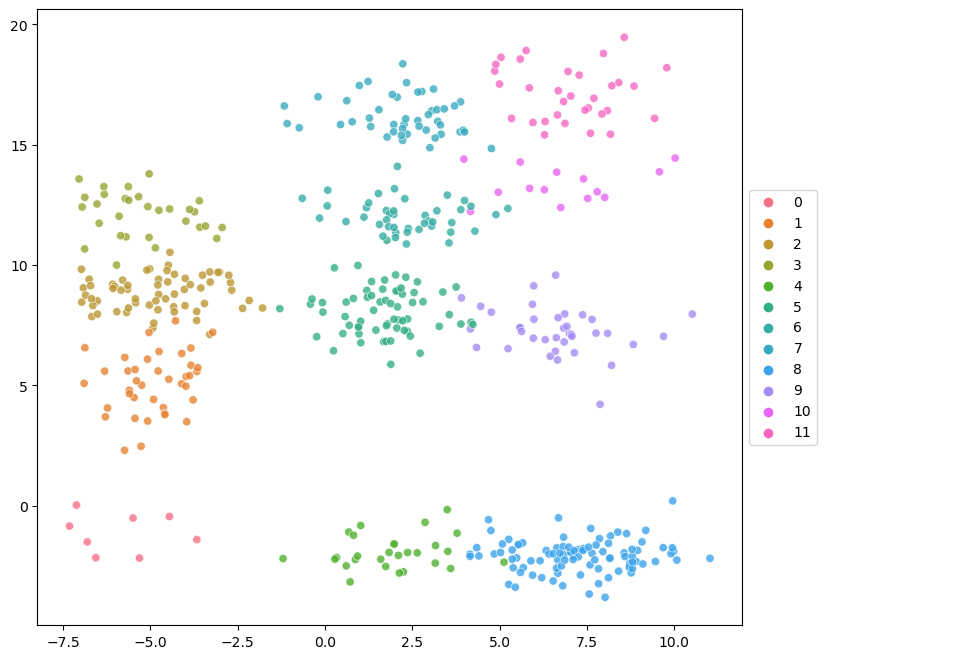

In [13]:
fig = plt.figure(figsize=(12, 8))
grid = plt.GridSpec(1, 2, width_ratios=[5, 1])
custom_palette = sns.color_palette("husl", len(np.unique(labels)))  # Use Seaborn's "husl" palette for n colors

# Create the scatterplot on the left side
ax1 = plt.subplot(grid[0, 0])
scatter = sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.8, hue=labels, ax=ax1, palette=custom_palette)

# Create a separate axis for the legend on the right side
ax2 = plt.subplot(grid[0, 1])
ax2.axis('off')  # Hide the axis for the legend
legend = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [14]:
R_est, P_est, Q_est, X_param_est, Y_param_est = generate_est_parameters(data, 15)

In [15]:
P_est

array([0.32970847, 0.33689972, 0.3333918 ])

In [16]:
R_est 

array([[0.2728179 , 0.24171782, 0.23912256, 0.24634173],
       [0.24659182, 0.2580095 , 0.24772676, 0.24767192],
       [0.23985341, 0.24236182, 0.2751384 , 0.24264637]])

In [17]:
Q_est

array([0.44211012, 0.43344861, 0.40934128])

In [18]:
X_param_est

array([[-7.07809332,  0.20409743],
       [ 4.90362655,  0.3799858 ],
       [ 9.56371297,  0.48261762]])

In [19]:
Y_param_est

array([[[-0.84283365,  0.9165831 ],
        [ 2.64720613,  0.4510891 ],
        [ 8.65339567,  0.52213896],
        [15.38895076,  0.52155359]],

       [[ 0.06447243,  0.35335878],
        [ 5.63585535,  0.62337229],
        [10.27365411,  0.39110071],
        [15.92096442,  0.39395906]],

       [[-3.34543559,  0.05512   ],
        [ 2.4661331 ,  0.6747308 ],
        [ 7.99932354,  0.48445259],
        [14.42082034,  0.02982957]]])

In [20]:
model = EMModel()
res = model.fit(data, R_est, P_est, Q_est, X_param_est, Y_param_est, epochs=10)

Epoch: 0
E-Step done
Time elapsed: 24.59271502494812 seconds
M-step done
Current log likelihood: -8686.144421528536
P:
 [0.27601549 0.59911357 0.12487093]
Q:
 [0.44206865 0.43344015 0.4092599 ]
R:
 [[0.04260662 0.1614428  0.65363691 0.14231367]
 [0.20507078 0.16973002 0.29017867 0.33502053]
 [0.44755661 0.27234237 0.22954536 0.05055566]]
X_param
 [[-4.99636664  1.47982714]
 [ 3.71251289  6.16123131]
 [ 8.35795028  1.24577477]]
Y_param
 [[[-1.1289433   0.40811712]
  [ 4.38494304  0.66330413]
  [ 8.76664241  2.19118139]
  [12.74799796  0.20605431]]

 [[-1.92213101  0.31915621]
  [ 7.25352527  0.30943244]
  [10.70444106  2.56840641]
  [16.30070798  1.64743024]]

 [[-2.64442133  0.20085488]
  [-1.09713042  1.66544811]
  [ 7.26270687  0.29871462]
  [14.07222875  0.15655229]]]
Epoch: 1
E-Step done
Time elapsed: 50.74648118019104 seconds
M-step done
Current log likelihood: -2709.5337340530677
P:
 [0.27464417 0.58931935 0.13603649]
Q:
 [0.44170914 0.43335245 0.4091934 ]
R:
 [[0.05701579 0.1830

In [21]:
model.current_likelihood_

array([-8686.14442153, -2709.53373405, -2682.53552113, -2669.04642647,
       -2664.41461121, -2662.07466822, -2660.72775328, -2659.75485182,
       -2658.91783705, -2658.14959149])

In [22]:
y_vals = model.current_likelihood_

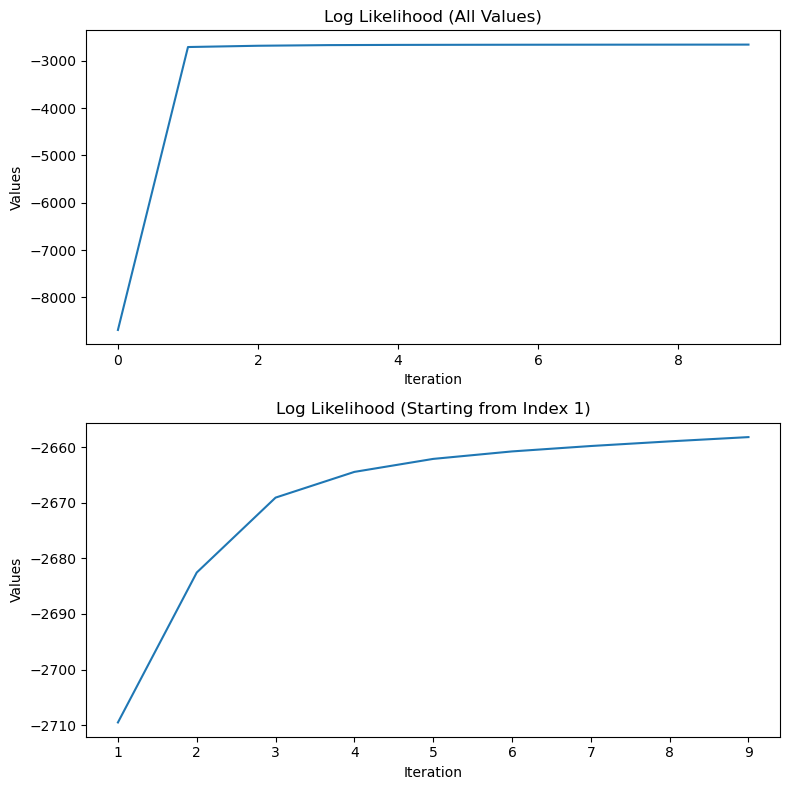

In [23]:
fig, axis = plt.subplots(2, 1, figsize=(8, 8))

ax = axis[0]

ax.plot(np.arange(len(y_vals)), y_vals)
ax.set_title('Log Likelihood (All Values)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')


ax = axis[1]
ax.plot(np.arange(1, len(y_vals)), y_vals[1:])
ax.set_title('Log Likelihood (Starting from Index 1)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')

plt.tight_layout();

In [24]:
P_true

array([0.25, 0.35, 0.4 ])

In [25]:
model.P

array([0.2712253 , 0.50860254, 0.22017215])

In [26]:
model.Q

array([0.43995294, 0.43239914, 0.40637416])

In [27]:
Q_true

array([0.1, 0.2, 0.6])

In [28]:
R_true

array([[0.1, 0.3, 0.4, 0.2],
       [0.2, 0.4, 0.2, 0.2],
       [0.5, 0.2, 0.1, 0.2]])

In [29]:
model.R

array([[0.05689177, 0.23871692, 0.51388445, 0.19050686],
       [0.12753146, 0.16514206, 0.37773029, 0.32959619],
       [0.2060164 , 0.54034478, 0.20166409, 0.05197473]])

In [30]:
np.sum(model.R, axis=1)

array([1., 1., 1.])

In [31]:
X_param_true

array([[-5. ,  1.5],
       [ 2. ,  1.6],
       [ 7. ,  2.2]])

In [32]:
model.X_param

array([[-5.02560895,  1.45029337],
       [ 3.19405848,  6.31512917],
       [ 7.39136781,  2.05835142]])

In [33]:
Y_param_true

array([[[-1. ,  0.5],
        [ 5. ,  1.5],
        [ 9. ,  0.5],
        [12. ,  0.8]],

       [[-2. ,  0.5],
        [ 8. ,  0.9],
        [12. ,  0.8],
        [16. ,  0.8]],

       [[-2. ,  0.5],
        [ 7. ,  0.9],
        [13. ,  0.8],
        [17. ,  0.8]]])

In [34]:
model.Y_param

array([[[-1.12350802,  0.40233294],
        [ 4.84267267,  1.00139036],
        [ 8.9113482 ,  1.02282334],
        [12.47698751,  0.36927641]],

       [[-1.90985866,  0.398832  ],
        [ 7.66205232,  0.36001096],
        [10.67946521,  5.10667878],
        [16.56195571,  1.11567559]],

       [[-2.10317492,  0.12485762],
        [-2.11437454,  0.51684178],
        [ 6.93585628,  0.26204744],
        [13.47563989,  0.2046822 ]]])